<a href="https://colab.research.google.com/github/bmatore/inft6201/blob/data-analysis/Data_Analysis_Report_Group_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams.update({'font.size': 20}) # Increase fontsize

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_accidents = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ny_accidents.csv", na_values='?')

# Data Analysis

In [15]:
df2 = df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39537 entries, 0 to 39536
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39537 non-null  int64  
 1   ID                     39537 non-null  object 
 2   Severity               39537 non-null  int64  
 3   Start_Time             39537 non-null  object 
 4   End_Time               39537 non-null  object 
 5   Start_Lat              39537 non-null  float64
 6   Start_Lng              39537 non-null  float64
 7   End_Lat                39537 non-null  float64
 8   End_Lng                39537 non-null  float64
 9   Distance.mi.           39537 non-null  float64
 10  Description            39537 non-null  object 
 11  Number                 11845 non-null  float64
 12  Street                 39537 non-null  object 
 13  Side                   39537 non-null  object 
 14  City                   39529 non-null  object 
 15  Co

In [5]:
df_accidents.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Number,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Speed.mph.,Precipitation.in.
count,3.953700e+04,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,39537.000000,11845.000000,39147.000000,38074.000000,39137.000000,39162.000000,39131.000000,38349.000000,37594.000000
mean,7.543609e+05,2.282900,41.714567,-74.806364,41.715110,-74.806824,0.654307,2133.770030,51.915442,49.177806,65.716253,29.713701,9.040011,9.132535,0.005389
std,3.307301e+05,0.642619,1.065492,1.685198,1.065188,1.685823,1.551176,3428.535678,16.787521,19.667776,20.599997,0.399174,2.668705,5.870588,0.027952
min,2.373510e+05,1.000000,40.523980,-79.748951,40.524638,-79.761920,0.000000,1.000000,-12.000000,-30.400000,13.000000,27.550000,0.000000,0.000000,0.000000
25%,4.998200e+05,2.000000,40.772600,-76.049410,40.774311,-76.047636,0.000000,215.000000,39.900000,34.000000,49.000000,29.470000,10.000000,5.000000,0.000000
50%,7.266940e+05,2.000000,41.065783,-73.929060,41.068520,-73.929030,0.192000,857.000000,51.000000,51.000000,67.000000,29.740000,10.000000,8.000000,0.000000
75%,9.178200e+05,2.000000,42.989290,-73.781207,42.987950,-73.781337,0.687000,2451.000000,65.000000,65.000000,84.000000,29.990000,10.000000,13.000000,0.000000
max,1.515693e+06,4.000000,44.917460,-71.943680,44.981057,-71.943680,49.240000,52027.000000,96.000000,96.000000,100.000000,30.710000,20.000000,40.000000,0.830000


In [6]:
df_accidents.shape

(39537, 48)

In [11]:
df1 = df_accidents.isnull().sum()
df1.to_excel('df_isnull.xls')

In [ ]:
#Number column is missing a lot of data, so it be dropped
df_accidents = df_accidents.drop('Number', axis=1)

In [ ]:
df_accidents.shape

(39537, 53)

In [8]:
#seperate Start Date and End Date into Date and Time fields
df_accidents['Start_Date'] = pd.to_datetime(df_accidents['Start_Time']).dt.date
df_accidents['Start_Time'] = pd.to_datetime(df_accidents['Start_Time']).dt.time
df_accidents['End_Date'] = pd.to_datetime(df_accidents['End_Time']).dt.date
df_accidents['End_Time'] = pd.to_datetime(df_accidents['End_Time']).dt.time

In [9]:
df_accidents['Start_Date'].min(), df_accidents['End_Date'].max()

(datetime.date(2019, 1, 1), datetime.date(2020, 12, 31))

In [ ]:
df_accidents.head(5)

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature.F.,Wind_Chill.F.,Humidity...,Pressure.in.,Visibility.mi.,Wind_Direction,Wind_Speed.mph.,Precipitation.in.,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Date,End_Date,Start_Hour,End_Hour,Start_Month,End_Month
0,237351,A-2953957,2,20:52:00,22:17:27,43.119443,-75.293198,43.120291,-75.293547,0.061,Incident on ORISKANY BLVD near HOUSE 131 Expec...,Oriskany Blvd,R,Whitesboro,Oneida,NY,13492-1322,US,US/Eastern,KRME,2020-12-03 20:53:00,32.0,32.0,75.0,29.47,10.0,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-12-03,2020-12-03,20,22,12,12
1,237362,A-2953968,2,23:19:55,23:41:46,40.834883,-73.866244,40.833773,-73.863254,0.174,Queuing traffic in White Plains Rd exit [5A] d...,Cross Bronx Expy E,R,Bronx,Bronx,NY,10460,US,US/Eastern,KLGA,2020-09-25 22:51:00,70.0,70.0,76.0,30.08,10.0,SSW,7.0,0.0,Mostly Cloudy,False,False,True,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-09-25,2020-09-25,23,23,9,9
2,237365,A-2953971,2,12:17:30,03:44:00,40.802117,-73.916498,40.804907,-73.911238,0.336,Stationary traffic on I-278 from 31st St/Hoyt ...,Bruckner Expy E,R,Bronx,Bronx,NY,10454,US,US/Eastern,KLGA,2020-10-15 11:51:00,71.0,71.0,51.0,29.98,10.0,S,16.0,0.0,Fair,False,False,False,False,True,False,False,False,False,True,False,False,False,Day,Day,Day,Day,2020-10-15,2020-10-16,12,3,10,10
3,237402,A-2954008,2,02:58:56,04:40:33,43.073669,-78.990615,43.075229,-78.990615,0.108,Crash right lane blocked on I-190 - Niagara Th...,North Grand Island Bridge,R,Niagara Falls,Niagara,NY,14304,US,US/Eastern,KIAG,2020-10-03 02:53:00,43.0,43.0,97.0,29.52,10.0,CALM,0.0,0.0,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2020-10-03,2020-10-03,2,4,10,10
4,237423,A-2954030,2,13:19:55,15:24:11,41.308840,-74.025331,41.307460,-74.027961,0.167,Incident on PALISADES INTERSTATE PKWY SB near ...,Palisades Interstate Pkwy S,R,Fort Montgomery,Orange,NY,10922,US,US/Eastern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2020-09-17,2020-09-17,13,15,9,9


In [ ]:
df_accidents['Start_Hour'] = pd.to_datetime(df_accidents['Start_Time'], format='%H:%M:%S').dt.hour
df_accidents['End_Hour'] = pd.to_datetime(df_accidents['End_Time'], format='%H:%M:%S').dt.hour

In [ ]:
df_accidents['Start_Month'] = pd.to_datetime(df_accidents['Start_Date']).dt.month
df_accidents['End_Month'] = pd.to_datetime(df_accidents['End_Date']).dt.month

In [ ]:
df_accidents['County'].nunique()

63

In [21]:
df_accidents['County'].unique()

array(['Oneida', 'Bronx', 'Niagara', 'Orange', 'Westchester', 'Erie',
       'New York', 'Monroe', 'Queens', 'Kings', 'Seneca', 'Schenectady',
       'Suffolk', 'Onondaga', 'Albany', 'Rockland', 'Cayuga', 'Delaware',
       'Nassau', 'Ulster', 'Chautauqua', 'Saratoga', 'Rensselaer',
       'Putnam', 'Columbia', 'Genesee', 'Oswego', 'Dutchess', 'Herkimer',
       'Montgomery', 'Richmond', 'Warren', 'Livingston', 'Greene',
       'Tioga', 'Ontario', 'Madison', 'Washington', 'Wyoming', 'Otsego',
       'Cortland', 'Cattaraugus', 'Jefferson', 'Fulton', 'Sullivan',
       'Broome', 'Schuyler', 'St. Lawrence', 'Steuben', 'Clinton',
       'Schoharie', 'Orleans', 'Wayne', 'Chemung', 'Hamilton', 'Chenango',
       'Yates', 'Lewis', 'Tompkins', 'Essex', 'Franklin', 'Allegany',
       'Saint Lawrence'], dtype=object)

# Data Visualisations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


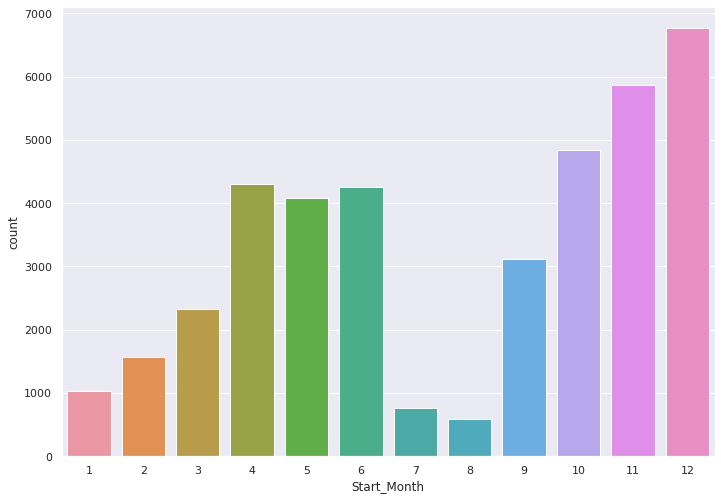

In [ ]:
sns.countplot(df_accidents['Start_Month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


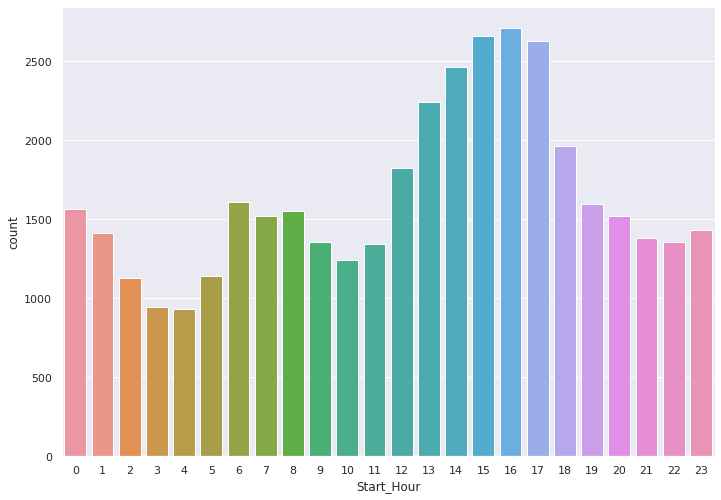

In [ ]:
sns.countplot(df_accidents['Start_Hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


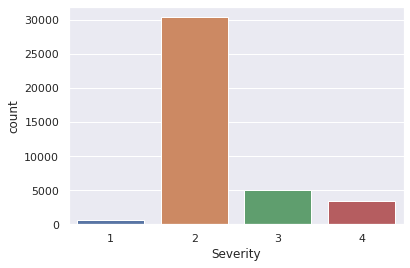

In [20]:
sns.countplot(df_accidents['Severity'])

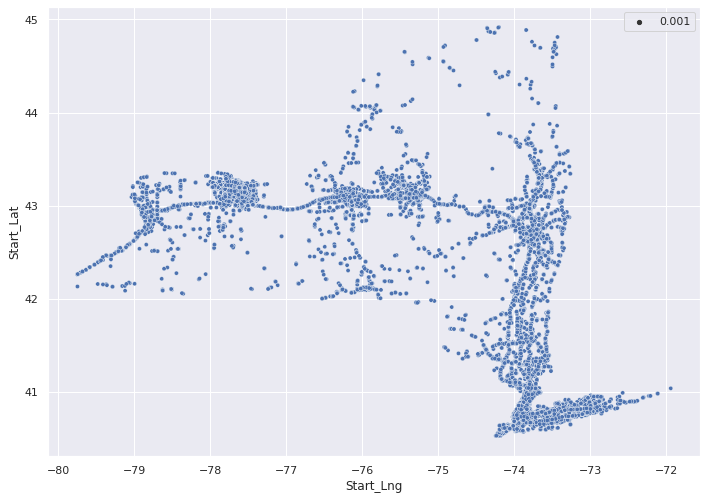

In [ ]:
sns.scatterplot(x=df_accidents.Start_Lng, y=df_accidents.Start_Lat, size=0.001)

In [34]:
#top county in NY by accident 
county_count = df_accidents.groupby('County').count().reset_index()
county_count_sort = county_count.sort_values(by = "ID", ascending = False)
county_count_sort = county_count_sort.head(15)

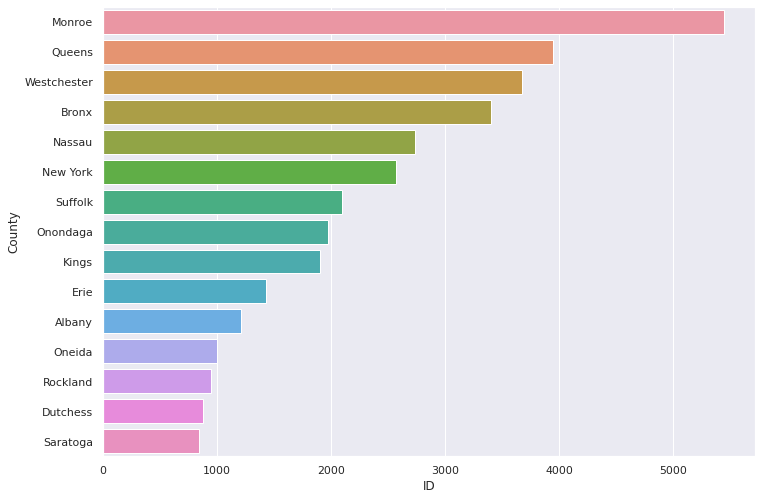

In [46]:
sns.barplot(y = "County", x = "ID", data = county_count_sort)

Analsying Accidents by Weather Conditions


Mean temperature: (51.92)



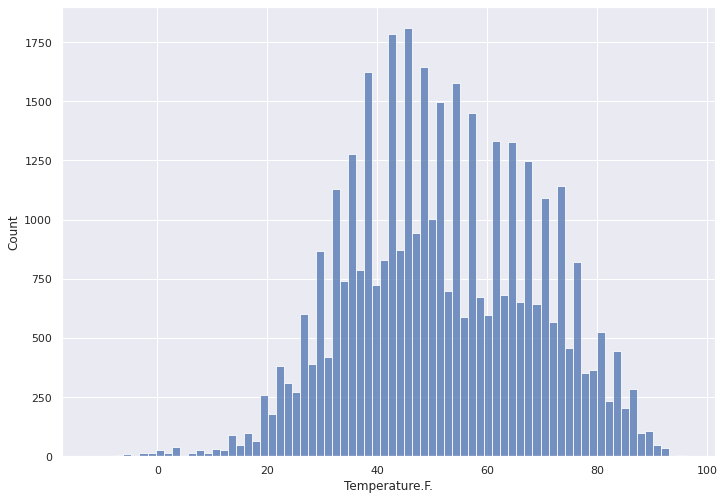

In [45]:
print('Mean temperature: ({:.2f})\n'.format(df_accidents['Temperature.F.'].mean()))

sns.histplot(data = df_accidents, x = "Temperature.F.")